# Model training

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from bcd.models.train_model import TrainModel
from bcd.utils.paths import data_processed_dir, models_dir

train_model = TrainModel()

sns.set_theme()

## Carga de datos

In [3]:
df_train = pd.read_csv(data_processed_dir("train.csv"))
df_test = pd.read_csv(data_processed_dir("test.csv"))

In [4]:
X_train = df_train.drop('diagnosis_result', axis=1)
y_train = df_train['diagnosis_result']

X_test = df_test.drop('diagnosis_result', axis=1)
y_test = df_test['diagnosis_result']

## Entrenamiento y ajuste de hiperparámetros

In [5]:
evolved_estimator_acc = train_model.genopt_training(X_train, y_train, scoring='accuracy')

Performing evolutionary optimization for XGBOOST...
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.819543	0.119487   	0.90854    	0.591608   
1  	30    	0.88945 	0.0240483  	0.908836   	0.845597   
2  	30    	0.90392 	0.0141629  	0.908836   	0.852541   
3  	30    	0.908658	0.000144769	0.908836   	0.90854    
4  	30    	0.908757	0.000130679	0.908836   	0.90854    
5  	30    	0.908816	7.37127e-05	0.908836   	0.90854    
6  	30    	0.908836	3.33067e-16	0.908836   	0.908836   
7  	30    	0.908363	0.00176911 	0.908836   	0.901743   
8  	30    	0.908836	3.33067e-16	0.908836   	0.908836   
Best XGBOOST model has accuracy score of 0.91
Exporting best model with accuracy score of 0.91
Model score: 0.9088356973995272


In [6]:
evolved_estimator_f1 = train_model.genopt_training(X_train, y_train, scoring='f1')

Performing evolutionary optimization for XGBOOST...
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.797114	0.21438    	0.876524   	0          
1  	30    	0.878305	0.00383321 	0.885947   	0.875302   
2  	30    	0.879036	0.004167   	0.885947   	0.876524   
3  	30    	0.881549	0.00470101 	0.885947   	0.876524   
4  	30    	0.884062	0.0037692  	0.885947   	0.876524   
5  	30    	0.885947	3.33067e-16	0.885947   	0.885947   
6  	30    	0.885296	0.0024336  	0.885947   	0.87619    
7  	30    	0.884668	0.00326039 	0.885947   	0.87619    
8  	30    	0.885947	3.33067e-16	0.885947   	0.885947   
Best XGBOOST model has f1 score of 0.89
Exporting best model with f1 score of 0.89
Model score: 0.8859465737514518


In [7]:
evolved_estimator_roc = train_model.genopt_training(X_train, y_train, scoring='roc_auc_ovr')

Performing evolutionary optimization for XGBOOST...
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.908381	0.0511258  	0.94812    	0.738596   
1  	30    	0.933473	0.00804299 	0.94812    	0.921805   
2  	30    	0.942515	0.00605735 	0.94812    	0.928791   
3  	30    	0.945911	0.00372399 	0.94812    	0.937845   
4  	30    	0.944398	0.00404709 	0.94812    	0.937845   
5  	30    	0.945417	0.00286544 	0.949405   	0.942152   
6  	30    	0.947063	0.00215881 	0.949405   	0.942168   
7  	30    	0.948156	0.00121716 	0.949405   	0.944862   
8  	30    	0.947943	0.00231778 	0.949405   	0.940821   
Best XGBOOST model has roc_auc_ovr score of 0.96
Exporting best model with roc_auc_ovr score of 0.96
Model score: 0.9552631578947368


In [13]:
def load_model(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Display classification report
    print(f"\n--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


--- Model 1 (Optimezed on accuracy) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.83      0.91        30

    accuracy                           0.92        62
   macro avg       0.93      0.92      0.92        62
weighted avg       0.93      0.92      0.92        62



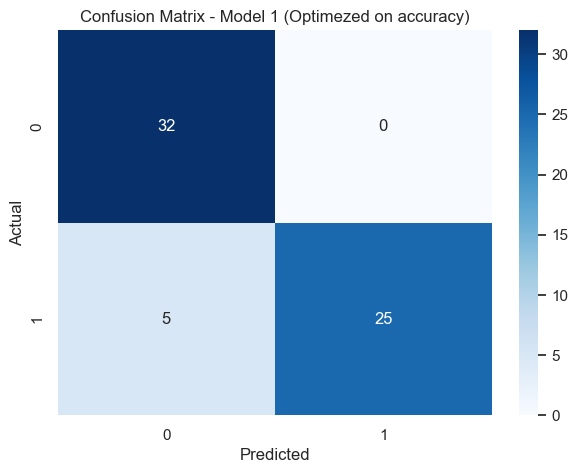


--- Model 2 (Optimezed on F1) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.83      0.91        30

    accuracy                           0.92        62
   macro avg       0.93      0.92      0.92        62
weighted avg       0.93      0.92      0.92        62



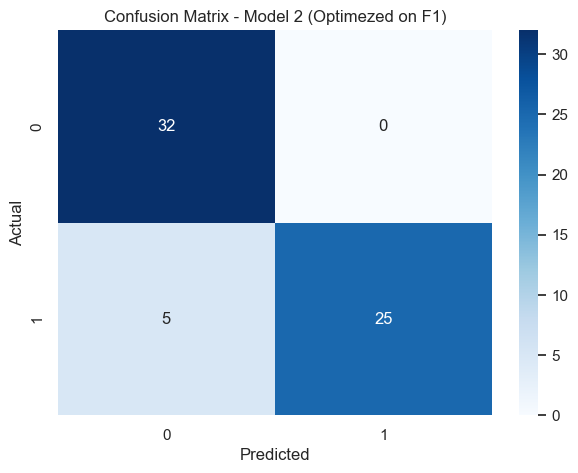


--- Model 3 (Optimezed on ROC-AUC) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.77      0.87        30

    accuracy                           0.89        62
   macro avg       0.91      0.88      0.88        62
weighted avg       0.91      0.89      0.89        62



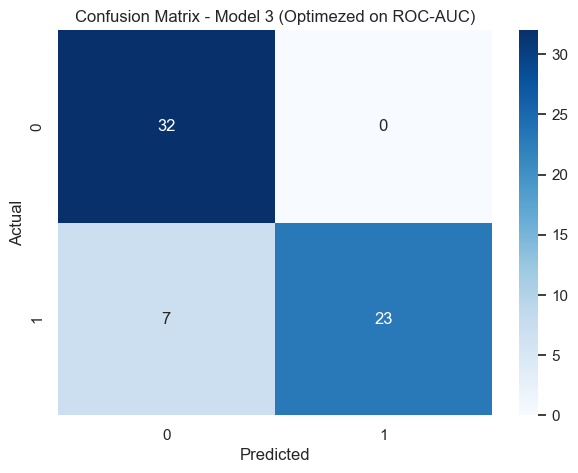


Model Performance Comparison:
                             Model  Accuracy
0  Model 1 (Optimezed on accuracy)  0.919355
1        Model 2 (Optimezed on F1)  0.919355
2   Model 3 (Optimezed on ROC-AUC)  0.887097


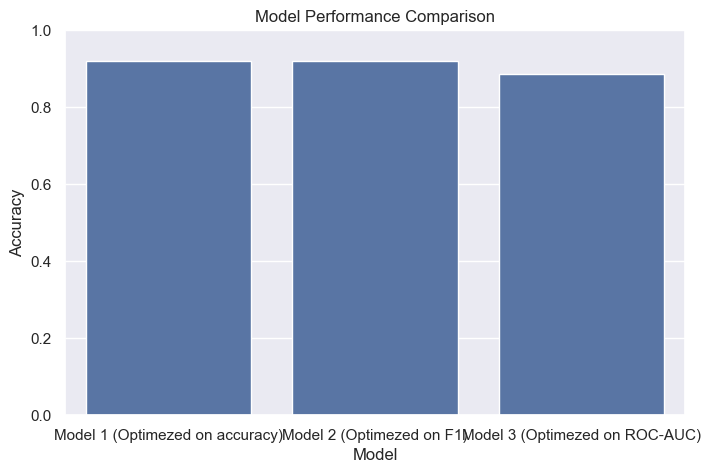

In [14]:
models = [
    {'path': models_dir('best_model_for_accuracy.pkl'), 'name': 'Model 1 (Optimezed on accuracy)'},
    {'path': models_dir('best_model_for_f1.pkl'), 'name': 'Model 2 (Optimezed on F1)'},
    {'path': models_dir('best_model_for_roc_auc_ovr.pkl'), 'name': 'Model 3 (Optimezed on ROC-AUC)'}
]

# Load and evaluate each model
for model_info in models:
    model = load_model(model_info['path'])
    evaluate_model(model, X_test, y_test, model_info['name'])


# Compare model performances
model_performances = []

for model_info in models:
    model = load_model(model_info['path'])
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    model_performances.append({
        'Model': model_info['name'],
        'Accuracy': accuracy
    })

# Display performance comparison
performance_df = pd.DataFrame(model_performances)
print("\nModel Performance Comparison:")
print(performance_df)

# Visualize performance comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()